In [431]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [432]:
file_to_read = "../Resources/AviationData_Weather.csv"

data_df = pd.read_csv(file_to_read, encoding='ISO-8859-1', low_memory=False)



data_df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

# Preproccessing

In [433]:

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

In [434]:
data_df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       81533.000000          75881.000000            74772.000000   
mean            1.147131              0.652772                0.280921   
std             0.447085              5.521338                1.557476   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          75349.000000     81370.000000  
mean               0.360814         5.311847  
std                2.257721        27.899156  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [435]:
data_df["Purpose.of.flight"].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting', 'EXLD',
       'BANT', 'GLDT', 'PUBU', 'Air Race show', 'ADRP'], dtype=object)

In [436]:
data_df["Aircraft.Category"].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

In [437]:
data_df.shape

(87282, 31)

In [438]:
# Keep rows where Investigation.Type = Accident, Country= United States, and Aircraft.Category= Airplane

filtered_df = data_df.loc[(data_df['Aircraft.Category']=='Airplane') & (data_df['Country']== 'United States') & (data_df['Investigation.Type'] == 'Accident')]
filtered_df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
5   20170710X52551           Accident      NYC79AA106  1979-09-17   
7   20020909X01562           Accident      SEA82DA022  1982-01-01   
8   20020909X01561           Accident      NYC82DA015  1982-01-01   
12  20020917X02148           Accident      FTW82FRJ07  1982-01-02   
13  20020917X02134           Accident      FTW82FRA14  1982-01-02   

            Location        Country   Latitude   Longitude Airport.Code  \
5         BOSTON, MA  United States  42.445277  -70.758333          NaN   
7        PULLMAN, WA  United States        NaN         NaN          NaN   
8   EAST HANOVER, NJ  United States        NaN         NaN          N58   
12         HOMER, LA  United States        NaN         NaN          NaN   
13        HEARNE, TX  United States        NaN         NaN          T72   

          Airport.Name  ... Purpose.of.flight Air.carrier  \
5                  NaN  ...               NaN  Air Canada   
7   BLACKBURN AG STRIP  ...          Personal         NaN   
8              HANOVER  ...          Business         NaN   
12                 NaN  ...          Personal         NaN   
13    HEARNE MUNICIPAL  ...          Personal         NaN   

   Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
5                   NaN                    NaN                  1.0   
7                   0.0                    0.0                  0.0   
8                   0.0                    0.0                  0.0   
12                  0.0                    0.0                  1.0   
13                  1.0                    0.0                  0.0   

   Total.Uninjured Weather.Condition  Broad.phase.of.flight   Report.Status  \
5             44.0               VMC                  Climb  Probable Cause   
7              2.0               VMC                Takeoff  Probable Cause   
8              2.0               IMC                Landing  Probable Cause   
12             0.0               IMC                 Cruise  Probable Cause   
13             0.0               IMC                Takeoff  Probable Cause   

   Publication.Date  
5        19-09-2017  
7        01-01-1982  
8        01-01-1982  
12       02-01-1983  
13       02-01-1983  

[5 rows x 31 columns]

In [439]:
filtered_df.shape

(22644, 31)

In [440]:
# percent of missing data per column
pct_missing = filtered_df.isnull().mean()

pct_missing_df = pd.DataFrame(pct_missing, columns=['Missing'])
pct_missing_df.sort_values('Missing', ascending = False, inplace = True)

# columns with more than 10% missing values
print(pct_missing_df[pct_missing_df['Missing'] > 0.1])

                         Missing
Schedule                0.933713
Broad.phase.of.flight   0.725314
Air.carrier             0.606474
Airport.Code            0.302288
Airport.Name            0.279456
Longitude               0.143835
Latitude                0.143393
Total.Fatal.Injuries    0.128643
Total.Serious.Injuries  0.127760
Total.Minor.Injuries    0.112568


In [441]:
# Drop columns with 35% missing values or more
dfb = filtered_df.copy()
cols_to_drop = list(pct_missing_df[pct_missing_df['Missing'] > 0.35].index)
dfb.drop(columns = cols_to_drop, axis =1, inplace = True, errors = 'coerce')
print(cols_to_drop)

['Schedule', 'Broad.phase.of.flight', 'Air.carrier']


In [442]:
# Check for duplicate rows
print(dfb.duplicated().sum())

0


In [443]:
# Change dates to datetime remove Cardinal point abb. from lat and lon

dfb.loc[:,'Event.Date'] = pd.to_datetime(dfb['Event.Date'])
dfb.loc[:,'Publication.Date'] = pd.to_datetime(dfb['Publication.Date'])
dfb.loc[:, 'Latitude'] = dfb['Latitude'].str.replace('N|S', '', regex = True)
dfb.loc[:,'Latitude'] = pd.to_numeric(dfb['Latitude'], downcast='float')
dfb.loc[:,'Longitude'] = dfb['Longitude'].str.replace('W|E','', regex= True)
dfb.loc[:,'Longitude'] = pd.to_numeric(dfb['Longitude'], downcast='float')



In [444]:
dfb.sample(10)

Event.Id Investigation.Type Accident.Number Event.Date  \
84882  20200615X93853           Accident      CEN20CA229 2020-06-12   
76302  20150220X45944           Accident      ERA15LA133 2015-02-19   
67525  20091209X11549           Accident      ERA10LA092 2009-12-06   
64204  20080421X00525           Accident      NYC08CA146 2008-03-16   
71174  20111211X12219           Accident      WPR12FA062 2011-12-10   
65180  20080913X01446           Accident      MIA08LA166 2008-08-16   
62493  20070828X01251           Accident      MIA07CA096 2007-05-09   
77     20020917X01982           Accident      DEN82FTE16 1982-01-11   
61100  20060810X01148           Accident      DFW06CA192 2006-07-23   
60435  20061004X01456           Accident      LAX06CA272 2006-04-08   

            Location        Country       Latitude      Longitude  \
84882  McCurtain, OK  United States   35842.000000  945458.000000   
76302     Rincon, PR  United States  181731.000000  671333.000000   
67525   Hatteras, NC  United States  351358.000000  753741.000000   
64204      Rayle, GA  United States  334723.000000   82541.000000   
71174  Armistead, CA  United States   35331.000000   11892.000000   
65180   Woodbine, NJ  United States   39139.000000  744741.000000   
62493   FAIRMONT, WV  United States      39.448334     -80.166389   
77      SAQUACHE, CO  United States            NaN            NaN   
61100      BOWIE, TX  United States      33.601665     -97.775558   
60435   COALINGA, CA  United States      36.247776    -120.237503   

      Airport.Code                Airport.Name  ...    Engine.Type  \
84882          NaN                         NaN  ...  Reciprocating   
76302          NaN                         NaN  ...  Reciprocating   
67525          HSE              Billy Mitchell  ...  Reciprocating   
64204          IIY           Washington-Wilkes  ...  Reciprocating   
71174          NaN                         NaN  ...  Reciprocating   
65180          1N4  Woodbine Municipal Airport  ...  Reciprocating   
62493          4G7         Fairmount Municipal  ...  Reciprocating   
77             28V                   COCHETOPA  ...  Reciprocating   
61100          0F2     Bowie Municipal Airport  ...  Reciprocating   
60435          308                Harris Ranch  ...  Reciprocating   

                 FAR.Description   Purpose.of.flight Total.Fatal.Injuries  \
84882                        137  Aerial Application                  0.0   
76302                        091            Personal                  1.0   
67525                        091            Personal                  0.0   
64204                        091            Personal                  0.0   
71174                        091            Personal                  1.0   
65180                        091       Instructional                  0.0   
62493  Part 91: General Aviation            Business                  NaN   
77     Part 91: General Aviation            Personal                  0.0   
61100  Part 91: General Aviation       Instructional                  NaN   
60435  Part 91: General Aviation            Personal                  NaN   

      Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
84882                    0.0                  1.0             0.0   
76302                    1.0                  0.0             0.0   
67525                    0.0                  0.0             1.0   
64204                    0.0                  0.0             1.0   
71174                    0.0                  0.0             0.0   
65180                    0.0                  0.0             1.0   
62493                    NaN                  NaN             1.0   
77                       0.0                  0.0             1.0   
61100                    NaN                  NaN             2.0   
60435                    NaN                  NaN             1.0   

       Weather.Condition                                      Report.Status  \
84882        

In [445]:
# Add year, month, and day columns and limit our DF to year 2000 and after
dfb['Year'] = dfb['Event.Date'].dt.year
dfb['Month'] = dfb['Event.Date'].dt.month_name()
dfb['Day_of_Week'] = dfb['Event.Date'].dt.day_name()
dfb = dfb[dfb['Year'] >= 2000]

# def day_of_week_to_string(day_of_week):
#     if day_of_week == 0:
#         return 'Monday'
#     elif day_of_week == 1:
#         return 'Tuesday'
#     elif day_of_week == 2:
#         return 'Wednesday'
#     elif day_of_week == 3:
#         return 'Thursday'
#     elif day_of_week == 4:
#         return 'Friday'
#     elif day_of_week == 5:
#         return 'Saturday'
#     elif day_of_week == 6:
#         return 'Sunday'

# dfb['Day_of_Week'] = dfb['Day_of_Week'].apply(day_of_week_to_string)
dfb.head()

Event.Id Investigation.Type Accident.Number Event.Date  \
47743  20001212X20393           Accident      LAX00LA078 2000-01-21   
47864  20001212X20487           Accident     FTW00FA083B 2000-02-16   
47869  20001212X20487           Accident     FTW00FA083A 2000-02-16   
47870  20001212X20472           Accident      DCA00MA026 2000-02-16   
47876  20001212X20521           Accident      LAX00LA105 2000-02-18   

                 Location        Country   Latitude   Longitude Airport.Code  \
47743         COMPTON, CA  United States        NaN         NaN          CPM   
47864       MCALESTER, OK  United States        NaN         NaN          MLC   
47869       MCALESTER, OK  United States        NaN         NaN          MLC   
47870  RANCHO CORDOVA, CA  United States        NaN         NaN          MHR   
47876            ELKO, NV  United States  40.816666 -115.791664          NaN   

                    Airport.Name  ... Total.Fatal.Injuries  \
47743                    COMPTON  ...                  NaN   
47864         MCALESTER REGIONAL  ...                  1.0   
47869         MCALESTER REGIONAL  ...                  1.0   
47870  Sacramento Mather Airport  ...                  3.0   
47876                        NaN  ...                  NaN   

      Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
47743                    NaN                  1.0             NaN   
47864                    NaN                  NaN             1.0   
47869                    NaN                  NaN             1.0   
47870                    NaN                  NaN             NaN   
47876                    NaN                  1.0             NaN   

      Weather.Condition   Report.Status Publication.Date  Year     Month  \
47743               VMC  Probable Cause       2015-08-16  2000   January   
47864               VMC  Probable Cause       2010-01-28  2000  February   
47869               VMC  Probable Cause       2010-01-28  2000  February   
47870               VMC  Probable Cause       2009-09-29  2000  February   
47876               VMC  Probable Cause       2010-07-15  2000  February   

      Day_of_Week  
47743      Friday  
47864   Wednesday  
47869   Wednesday  
47870   Wednesday  
47876      Friday  

[5 rows x 31 columns]

In [446]:
dfb.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float32
Longitude                        float32
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured 

In [447]:
# value counts
for col in dfb.columns:
    print(dfb[col].value_counts().nlargest(10))
    print('--------------------------\n')

20071108X01768    2
20010226X00510    2
20080213X00187    2
20061015X01521    2
20070426X00458    2
20050825X01313    2
20060601X00665    2
20070705X00879    2
20070111X00042    2
20051213X01965    2
Name: Event.Id, dtype: int64
--------------------------

Accident    19456
Name: Investigation.Type, dtype: int64
--------------------------

LAX00LA078    1
GAA16CA104    1
GAA16CA109    1
GAA16CA108    1
CEN16FA086    1
CEN16FA087    1
ERA16FA089    1
GAA16CA105    1
CEN16FA083    1
GAA16CA348    1
Name: Accident.Number, dtype: int64
--------------------------

2011-06-18    14
2010-05-29    14
2011-03-19    14
2011-07-23    14
2012-08-31    14
2012-07-21    13
2018-09-01    13
2008-08-02    12
2007-10-07    12
2011-08-13    12
Name: Event.Date, dtype: int64
--------------------------

Anchorage, AK      90
Talkeetna, AK      67
Phoenix, AZ        64
Palmer, AK         64
Fairbanks, AK      62
Atlanta, GA        53
Houston, TX        50
Reno, NV           50
Miami, FL          48
San Ant

In [448]:
dfb.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float32
Longitude                        float32
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured 

In [449]:
# bucket private and none
# dfb["Airport.Name"] = dfb["Airport.Name"].fillna("Unknown")

dfb["Airport.Name"] = dfb["Airport.Name"].apply(lambda x: "Unknown" if pd.isnull(x) else "Private" if "private" in x.lower() else "Private" if "pvt" in x.lower() else "None" if "none" in x.lower()  else x)
dfb["Airport.Name"] = dfb["Airport.Name"].str.title()
dfb["Airport.Name"].value_counts()

Unknown                           5172
Private                            470
None                                49
Merrill Field                       30
Phoenix Deer Valley                 26
                                  ... 
Mallards Landing Airport             1
Palm Springs Internat'L Airpor       1
County Memorial Airport              1
Park Falls Municipal Airport         1
Ellinwood Muni                       1
Name: Airport.Name, Length: 7691, dtype: int64

In [450]:
for airport_name in dfb["Airport.Name"].sort_values(ascending=True).unique():
  print(airport_name)

12E Airstrip
29 Palms Airport
50S
85Th Avenue Airstrip
A L Mangham Jr Rgnl
A L Mangham Jr. Regional
A R S Sport Strip
A&P Airpark Airport
A.L. Mangham Jr. Regional
Abbeville
Abbeville Municipal Airport
Aberdeen Muni
Aberdeen Regional Airport
Abernathy Airport
Abernathy Fielld
Abernathy Muni
Abilene Municipal
Abilene Regional
Abilene Regional Airport
Abilene Rgnl
Abraham Lincoln Capital
Abraham Lincoln Capital Airpor
Abraham Lincoln Capital Arpt
Abraham Lincoln Capital Arpt.
Abrams Municipal
Acadiana Regional
Accomack County
Accomack County Airport
Ada Regional Airport
Addington Field
Addington Field Airport
Addison
Addison Airport
Adelano Airport
Adelanto
Adirondack Regional Airport
Adrmore Downtown Executive
Aero Acres Airport
Aero Country
Aero Country Airport
Aero Estates
Aero Plantation
Aero Tech Inc. Airport
Aero Valley Airport
Aeroacres
Aeroacres Airport
Aerobatic Practice Airport
Aerobear Field
Aeroflex-Andover
Aeroflex-Andover Airport
Afton
Afton Muni
Afton Municipal Airport
Ag 

In [451]:

# # Load the JSON file
# with open('../airports.json') as json_file:
#      data = json.load(json_file)

# # Create empty lists of standardized airport names, lon, lata
# airport_names = [] 
# lons = []
# lats = []

# # print(data)

# for row in data:
#     # print(data[row])

#     for key in data[row]:
#         # print(key, data[row][key])
#         if key == "name":
#             airport_names.append(data[row][key])
#         elif key == "lon":
#             lons.append(data[row][key])
#         elif key == "lat":
#             lats.append(data[row][key])
#     # print()

# coords = [(lon, lat) for lon, lat in zip(lons, lats)]
# # print(airport_names, lats, lons)
# print(airport_names[:4], coords[:4])

In [452]:
for airport_name in dfb["Airport.Name"].sort_values(ascending=True).unique():
  print(airport_name)

12E Airstrip
29 Palms Airport
50S
85Th Avenue Airstrip
A L Mangham Jr Rgnl
A L Mangham Jr. Regional
A R S Sport Strip
A&P Airpark Airport
A.L. Mangham Jr. Regional
Abbeville
Abbeville Municipal Airport
Aberdeen Muni
Aberdeen Regional Airport
Abernathy Airport
Abernathy Fielld
Abernathy Muni
Abilene Municipal
Abilene Regional
Abilene Regional Airport
Abilene Rgnl
Abraham Lincoln Capital
Abraham Lincoln Capital Airpor
Abraham Lincoln Capital Arpt
Abraham Lincoln Capital Arpt.
Abrams Municipal
Acadiana Regional
Accomack County
Accomack County Airport
Ada Regional Airport
Addington Field
Addington Field Airport
Addison
Addison Airport
Adelano Airport
Adelanto
Adirondack Regional Airport
Adrmore Downtown Executive
Aero Acres Airport
Aero Country
Aero Country Airport
Aero Estates
Aero Plantation
Aero Tech Inc. Airport
Aero Valley Airport
Aeroacres
Aeroacres Airport
Aerobatic Practice Airport
Aerobear Field
Aeroflex-Andover
Aeroflex-Andover Airport
Afton
Afton Muni
Afton Municipal Airport
Ag 

In [453]:
# "Anchorage, AK" Split 'Location' in City and State
dfb['Location'] = dfb['Location'].str.replace(',', ', ')
dfb[['City','State']] = dfb['Location'].str.split(', ', n=1, expand=True)
dfb['City'] = dfb['City'].str.title()
dfb[['City','State']]

City State
47743         Compton    CA
47864       Mcalester    OK
47869       Mcalester    OK
47870  Rancho Cordova    CA
47876            Elko    NV
...               ...   ...
87264      South Bend    IN
87265       Ellinwood    KS
87270         Ivanhoe    CA
87271         Houston    TX
87277         Auxerre    OF

[19456 rows x 2 columns]

In [454]:
# Combine same Makes 
dfb["Make"] = dfb["Make"].str.title()


In [455]:
for make in dfb['Make'].unique():
  print(make)

dfb['Make'].nunique()

Myers
Cessna
Douglas
Ayres
Boeing
Learjet
Steel/Vans
Schweizer
Beech
Mcdonnell Douglas
Dassault-Breguet
Meshko Zenair
Piper
De Havilland
Henry
Bennett
Moravan
Taylorcraft
Schuchart
Edge
Thomson
Rans, Inc.
Swearingen
Ercoupe
Waco
Grenier
Gulfstream American
Aero Commander
Baughman
Grumman
Bilgri
Eckstein
Air Tractor
Giroux
Grumman American
Crawford
Bellanca
Tomash
Beechcraft
Ercoupe (Eng & Research Corp.)
Aviat
Mooney
Consolidated Aeronautics Inc.
Carlisle
Maule
Mathews
Larry Woods
Socata
Wsk Pzl Mielec
Ayers
Kolb Company
Stinson
Maysmike
Diamond Aircraft Industries
Aircraft Mfg & Dev. Co. (Amd)
Lancair
Kucklick
Fairchild
Unknown
Wells
Starduster
Williams
Lockheed
Price
Lake
American General Aircraft
Howard Aircraft Corp.
Velocity
Avions Max Holste
Cleveland Orson
William F. Lair
R. James Thorne
Globe
Clement-Kazmierczak
Luscombe
Fleet
American Champion (Acac)
Danbrook
Jerry Garrison
Menefee
Rockwell
Dantzer Lawrence L
Yakovlev
Aeronca
Andrews
Bolger Scott
Sawyer
Villeneuve
Fraker
Loehl

3119

In [456]:
most_common_make = dfb['Make'].value_counts().nlargest(30)
most_common_make

Cessna                            6002
Piper                             3381
Beech                             1182
Mooney                             314
Boeing                             288
Bellanca                           209
Maule                              198
Air Tractor Inc                    196
Aeronca                            182
Cirrus Design Corp                 170
Air Tractor                        170
Champion                           146
Luscombe                           134
Grumman                            126
Stinson                            124
Vans                               102
North American                      95
Cirrus                              88
Taylorcraft                         85
Dehavilland                         80
Aero Commander                      75
Aviat Aircraft Inc                  70
Aviat                               67
Diamond Aircraft Ind Inc            63
Grumman Acft Eng Cor-Schweizer      58
Socata                   

In [457]:
# combine registration labels
dfb['Registration.Number'] = dfb['Registration.Number'].apply(lambda x: "Unknown" if pd.isnull(x) else "NONE" if "none" in x.lower() else "UNREG" if "unreg" in x.lower() else x)

In [458]:
dfb['Registration.Number'].value_counts().nlargest(10)

UNREG     60
NONE      16
N8402K     5
N5408Y     4
N323KT     4
N99HV      4
N65645     3
N460CT     3
N185DK     3
N8376K     3
Name: Registration.Number, dtype: int64

In [459]:
for registration in dfb['Registration.Number'].unique():
  print(registration)

N813S
N9505B
N91994
N8079U
N4011Y
N668SW
N86BE
N522SW
N64ME
N3629D
N806BF
EI-CRL
N155DL
N5883B
N1DC
N17AE
N3735D
N802US
N59CF
N4386W
N2507X
N9277X
N7640P
N120BA
N696DH
N262MM
N241GS
N125PM
N8253W
N526GC
N5142D
N4418U
N325HP
N7202E
N63351
N4795D
N612UA
N39945
N3862D
N541TW
N325L
N1173R
N6134A
N7427J
N556UP
N87WW
N509R
N754NW
N4642J
N9454J
N5079J
N4090D
N94769
NC662Y
N140NJ
N1419
N3545R
N52WP
N7744B
N358RW
N7791V
N290KB
N6912S
N4866Q
N623U
N1373E
N9B
N747BS
N6321B
N2326S
N1029G
N81310
N3R
N7634Z
N8851V
N7300R
N369AF
N6688D
N9855S
N2601N
N3989H
N2870S
N6QR
N21689
N5337B
N5556Q
N3345Y
N847EX
N1302D
N5244D
N878A
N5066M
N4794P
N6193V
N402ME
N2585B
N9852J
N1122Y
N752CF
N628
N5629G
N944FE
N9973H
N132JH
N219ME
N366X
N613SP
N4413C
N405BM
N2535R
CGDJF
N757AZ
N705QD
N175W
N82204
N76494
N258P
N221SA
N1156N
N55175
N211EZ
N82946
NONE
N759XA
N4903F
N53352
N2279Y
N9298D
N8548S
N7342G
N555MR
N930TG
N4506L
N2825X
N4133Y
N7501H
N6216M
N540Q
N279WP
N70LB
N410GV
N787WW
N33WL
N83272
N25SF
N905CT
N299KP
N758L

In [460]:
# Change to 0 and 1 in case data is used for machine learning
dfb['Amateur.Built'] = dfb['Amateur.Built'].map({'Yes': 1, 'No': 0, 'Y': 1, 'N':0})
dfb['Amateur.Built'].value_counts()

0.0    16682
1.0     2772
Name: Amateur.Built, dtype: int64

In [461]:
# Combine injury values
dfb['Injury.Severity'] = dfb['Injury.Severity'].str.split('(').str[0]
dfb['Injury.Severity'].fillna('Unknown')

47743    Non-Fatal
47864        Fatal
47869        Fatal
47870        Fatal
47876    Non-Fatal
           ...    
87264    Non-Fatal
87265    Non-Fatal
87270    Non-Fatal
87271    Non-Fatal
87277        Fatal
Name: Injury.Severity, Length: 19456, dtype: object

In [462]:
dfb['Injury.Severity'].value_counts()

Non-Fatal    16407
Fatal         3018
Name: Injury.Severity, dtype: int64

In [463]:
# Check weather conditions column
dfb.loc[:,'Weather.Condition'] = dfb['Weather.Condition'].replace({'Unk': 'UNK'})
dfb['Weather.Condition'].value_counts()

VMC    18178
IMC      910
UNK       82
Name: Weather.Condition, dtype: int64

In [464]:
dfb = dfb.dropna(subset=["Weather.Condition"])

In [465]:
# Add a seasons column
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'if month in [9,10,11] else none
    
dfb.loc[:,'Season'] = dfb["Event.Date"].dt.month.apply(assign_season)

In [466]:
dfb['Report.Status'].dtype

dtype('O')

In [467]:
dfb["Report.Status"].isna().sum()

1232

In [468]:
dfb["Report.Status"].count()

17938

In [469]:
dfb.dropna(subset=["Report.Status"], inplace=True)

In [470]:
dfb["Report.Status"].count()

17938

In [471]:
for reports in dfb["Report.Status"]:
    print(reports)

Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable Cause
Probable C

In [472]:
pilot_error = dfb[dfb["Report.Status"].str.contains('pilot', case=False) & ~dfb["Report.Status"].str.contains('weather|climate', case=False)]
pilot_error

Event.Id Investigation.Type Accident.Number Event.Date  \
63913  20080107X00026           Accident      SEA08LA057 2008-01-01   
63914  20080109X00036           Accident      DFW08CA054 2008-01-01   
63915  20080115X00051           Accident      DEN08CA047 2008-01-02   
63916  20080210X00166           Accident      NYC08CA074 2008-01-02   
63921  20080115X00047           Accident      MIA08LA035 2008-01-05   
...               ...                ...             ...        ...   
86902  20210916103885           Accident      WPR21LA347 2021-09-15   
86906  20210916103892           Accident      CEN21LA422 2021-09-16   
86909  20210920103910           Accident      CEN21LA430 2021-09-16   
86917  20210927103966           Accident      CEN21LA453 2021-09-17   
86931  20210920103912           Accident      WPR21LA348 2021-09-19   

                Location        Country  Latitude  Longitude Airport.Code  \
63913        Sonoma,  CA  United States  381326.0  1222659.0          OQ3   
63914        Arcola,  TX  United States  293022.0   952836.0          AXH   
63915      Loveland,  CO  United States   40276.0    10504.0          FNL   
63916     Brunswick,  GA  United States    3196.0   812328.0          SSI   
63921  Spotsylvania,  VA  United States   38128.0   773515.0          NaN   
...                  ...            ...       ...        ...          ...   
86902       Stanley,  ID  United States  441231.0   114564.0          2U7   
86906     Ypsilanti,  MI  United States  421418.0   833218.0          YIP   
86909  Battle Creek,  MI  United States  421827.0    85155.0          BTL   
86917   Osage Beach,  MO  United States   38639.0   924051.0          K15   
86931  Grass Valley,  CA  United States  391327.0    12109.0          GOO   

                         Airport.Name  ... Total.Uninjured Weather.Condition  \
63913              Schellville/Sonoma  ...             3.0               VMC   
63914               Houston-Southwest  ...             1.0               VMC   
63915           Fort Collins Loveland  ...             1.0               VMC   
63916        Malcolm Mckinnon Airport  ...             3.0               VMC   
63921                         Unknown  ...             0.0               VMC   
...                               ...  ...             ...               ...   
86902                         Stanley  ...             1.0               VMC   
86906                      Willow Run  ...             1.0               VMC   
86909  Battle Creek Exec At Kellogg F  ...             2.0               VMC   
86917        Grand Glaize-Osage Beach  ...             2.0               VMC   
86931                   Nevada County  ...             1.0               VMC   

                                           Report.Status Publication.Date  \
63913   The departing pilot's inadequate visual lookout.       2020-09-25   
63914  The pilot's failure to maintain directional co...       2020-09-25   
63915  the student pilot's premature flare resulting ...       2020-09-25   
63916  The pilot's inadequate compensation for wind c...       2020-09-25   
63921  The pilot's failure to follow the checklist an...       2020-09-25   
...                                                  ...              ...   
86902  The pilots failure to maintain airplane contr...       2021-11-16   
86906  The pilots failure to maintain directional co...       2021-11-16   
86909  The pilots failure to maintain directional co...       2021-11-16   
86917  The pilot and flight instructors failure to e...       2021-11-16   
86931  The pilots failure to attain a proper touchdo...       2021-11-16   

       Year      Month  Day_of_Week          City State  Season  
63913  2008    January      Tuesday        Sonoma    CA  Winter  
63914  2008    January      Tuesday        Arcola    TX  Winter  
63915  2008    January    Wednesday      Loveland    CO  Winter  
63916  2008    January    Wednesday     Brunswick    GA  Winter  
63921  2008    Janu

In [473]:
for report in pilot_error["Report.Status"]:
    print(report)
    print(" ")

The departing pilot's inadequate visual lookout.
 
The pilot's failure to maintain directional control.  A contributing factor was the prevailing crosswind.
 
the student pilot's premature flare resulting in the loss of aircraft control.
 
The pilot's inadequate compensation for wind conditions.  A factor in the accident was the wind gust.
 
The pilot's failure to follow the checklist and failure to achieve the proper touchdown point during a forced landing. Contributing to the accident was a loss of engine power due to a cracked No. 4 top sparkplug insulator, resulting in pre-ignition/detonation and the failure of the No. 2 connecting rod cap due to evacuation of the oil supply.
 
The failure of company maintenance personnel to ensure that the airplane's nose baggage door latching mechanism was properly configured and maintained, resulting in an inadvertent opening of the nose baggage door in flight. Contributing to the accident were the lack of information and guidance available to t

In [474]:
cause_weather = dfb[dfb["Report.Status"].str.contains('weather|climate|rain|snow|thunder|cloud', case=False)]
cause_weather

Event.Id Investigation.Type Accident.Number Event.Date  \
63920  20080214X00194           Accident      CHI08CA060 2008-01-04   
63936  20080117X00068           Accident      SEA08LA058 2008-01-10   
63943  20080115X00052           Accident      DEN08LA049 2008-01-12   
63958  20080118X00074           Accident      ANC08LA031 2008-01-15   
63968  20080220X00218           Accident      DEN08CA051 2008-01-17   
...               ...                ...             ...        ...   
86523  20210707103436           Accident      ANC21LA053 2021-07-06   
86554  20210713103463           Accident      WPR21LA267 2021-07-11   
86606  20210729103584           Accident      WPR21LA296 2021-07-22   
86719  20210809103661           Accident      WPR21LA308 2021-08-09   
86902  20210916103885           Accident      WPR21LA347 2021-09-15   

                 Location        Country  Latitude  Longitude Airport.Code  \
63920  Whitmore Lake,  MI  United States  422235.0   834734.0          NaN   
63936         Perris,  CA  United States   33535.0   117158.0          NaN   
63943    Pine Bluffs,  WY  United States   41912.0   104749.0          82V   
63958         Bethel,  AK  United States  604647.0  1615017.0         PABE   
63968           Taos,  NM  United States  362729.0  1054020.0          SKX   
...                   ...            ...       ...        ...          ...   
86523    Kenney Lake,  AK  United States  614354.0  1445637.0          PVT   
86554            May,  ID  United States  442631.0  1134638.0         0ID2   
86606         Chelan,  WA  United States   47521.0  1195629.0         91WT   
86719           Reno,  NV  United States  392546.0  1193944.0          NaN   
86902        Stanley,  ID  United States  441231.0   114564.0          2U7   

              Airport.Name  ... Total.Uninjured Weather.Condition  \
63920              Unknown  ...             2.0               VMC   
63936              Unknown  ...             0.0               VMC   
63943          Pine Bluffs  ...             2.0               VMC   
63958               Bethel  ...             4.0               VMC   
63968            Taos Muni  ...             4.0               VMC   
...                    ...  ...             ...               ...   
86523              Private  ...             1.0               VMC   
86554  Flying Joseph Ranch  ...             1.0               VMC   
86606    Riverview Airpark  ...             1.0               VMC   
86719              Unknown  ...             3.0               VMC   
86902              Stanley  ...             1.0               VMC   

                                           Report.Status Publication.Date  \
63920  The partial loss of engine power for undetermi...       2020-09-25   
63936  The pilot's failure to maintain clearance from...       2020-09-25   
63943  The pilot's failure to maintain control of the...       2020-09-25   
63958  The pilot's selection of unsuitable terrain fo...       2020-09-25   
63968  The pilot's excessive airspeed during the appr...       2020-09-25   
...                                                  ...              ...   
86523  The pilots failure to maintain adequate clear...       2021-12-17   
86554  The pilots failure to maintain directional co...       2021-12-17   
86606  The pilots unstable approach to land in turbu...       2021-09-20   
86719  The pilots failure to maintain clearance from...       2021-11-16   
86902  The pilots failure to maintain airplane contr...       2021-11-16   

       Year      Month  Day_of_Week           City State  Season  
63920  2008    January       Friday  Whitmore Lake    MI  Winter  
63936  2008    January     Thursday         Perris    CA  Winter  
63943  2008    January     Saturday    Pine Bluffs    WY  Winter  
63958  2008    January      Tuesday         Bethel    AK  Winter  
63968  2008    January     Thursday           Taos    NM  Winter  
...     ...        ...          ...            ...   ...     ...  


In [475]:
for report in cause_weather["Report.Status"]:
    print(report)
    print(" ")

The partial loss of engine power for undetermined reasons during cruise and the unsuitable terrain encountered during the precautionary landing.  A factor was the snow-covered ground.
 
The pilot's failure to maintain clearance from terrain while maneuvering.
 
The pilot's failure to maintain control of the airplane. Contributing factors in this accident were the unfavorable wind and the snow bank.
 
The pilot's selection of unsuitable terrain for landing. Contributing to the accident were snow-covered terrain, blowing snow and flat lighting conditions.
 
The pilot's excessive airspeed during the approach and loss of control during the landing.  Contributing factors were the mountain turbulence and the snowbank.
 
An in-flight loss of control and an uncontrolled descent into terrain for undetermined reasons.
 
The student pilot's failure to maintain directional control of the airplane during the landing roll.  Contributing to the accident were the snow-covered runway and the gusty wind

In [476]:
probable_cause = dfb[dfb["Report.Status"].str.contains("Probable Cause",case=False)]

In [477]:
probable_cause

Event.Id Investigation.Type Accident.Number Event.Date  \
47743  20001212X20393           Accident      LAX00LA078 2000-01-21   
47864  20001212X20487           Accident     FTW00FA083B 2000-02-16   
47869  20001212X20487           Accident     FTW00FA083A 2000-02-16   
47870  20001212X20472           Accident      DCA00MA026 2000-02-16   
47876  20001212X20521           Accident      LAX00LA105 2000-02-18   
...               ...                ...             ...        ...   
79103  20161011X64047           Accident      ERA17FA011 2016-10-11   
79781  20170418X44152           Accident      ERA17LA158 2017-04-18   
80571  20170925X80437           Accident      ANC17LA053 2017-09-04   
81748  20180617X31552           Accident      ANC18LA079 2018-06-17   
82102  20180812X92421           Accident      WPR18FA220 2018-08-11   

                  Location        Country       Latitude     Longitude  \
47743         COMPTON,  CA  United States            NaN           NaN   
47864       MCALESTER,  OK  United States            NaN           NaN   
47869       MCALESTER,  OK  United States            NaN           NaN   
47870  RANCHO CORDOVA,  CA  United States            NaN           NaN   
47876            ELKO,  NV  United States      40.816666 -1.157917e+02   
...                    ...            ...            ...           ...   
79103   East Hartford,  CT  United States  414412.000000  7.238580e+05   
79781        Euharlee,  GA  United States   34839.000000  8.454450e+05   
80571          Kodiak,  AK  United States  574651.000000  1.522329e+06   
81748       Fullerton,  CA  United States  335219.000000  1.175847e+06   
82102      Steilacoom,  WA  United States   47853.000000  1.223815e+06   

      Airport.Code               Airport.Name  ... Total.Uninjured  \
47743          CPM                    Compton  ...             NaN   
47864          MLC         Mcalester Regional  ...             1.0   
47869          MLC         Mcalester Regional  ...             1.0   
47870          MHR  Sacramento Mather Airport  ...             NaN   
47876          NaN                    Unknown  ...             NaN   
...            ...                        ...  ...             ...   
79103          HFD          Hartford-Brainard  ...             0.0   
79781          NaN                    Unknown  ...             0.0   
80571          T44              Trident Basin  ...             4.0   
81748          FUL             Fullerton Muni  ...             1.0   
82102          NaN                    Unknown  ...             0.0   

      Weather.Condition                                      Report.Status  \
47743               VMC                                     Probable Cause   
47864               VMC                                     Probable Cause   
47869               VMC                                     Probable Cause   
47870               VMC                                     Probable Cause   
47876               VMC                                     Probable Cause   
...                 ...                                                ...   
79103               VMC  The NTSB did not determine the probable cause ...   
79781               VMC  The NTSB did not determine the probable cause ...   
80571               VMC  ***This probable cause was modified on Novembe...   
81748               VMC  The National Transportation Safety Board did n...   
82102               VMC  The NTSB did not determine the probable cause ...   

      Publication.Date  Year      Month  Day_of_Week            City State  \
47743       2015-08-16  2000    January       Friday         Compton    CA   
47864       2010-01-28  2000   February    Wednesday       Mcalester    OK   
47869       2010-01-28  2000   February    Wednesday       Mcalester    OK   
47870       2009-09-29  2000   February    Wednesday  Rancho Cordova    CA   
47876       2010-07-15  2000   February       Friday            Elko    NV   
...                ...   

In [478]:
lost_planes= dfb[dfb["Report.Status"].str.contains("Unknown",case=False)]

In [479]:
lost_planes

Event.Id Investigation.Type Accident.Number Event.Date  \
64410  20080610X00821           Accident      LAX08CA096 2008-04-25   
64569  20080529X00751           Accident      DEN08LA095 2008-05-23   
65286  20080903X01364           Accident      DEN08LA145 2008-09-01   
65462  20081006X90012           Accident      WPR09CA002 2008-10-03   
65602  20081107X25522           Accident      WPR09LA032 2008-11-07   
...               ...                ...             ...        ...   
80916  20171127X63140           Accident      CEN18LA040 2017-11-26   
81481  20180502X52741           Accident      ERA18FA138 2018-05-02   
81695  20180611X23020           Accident      ANC18FA044 2018-06-09   
81850  20180704X10947           Accident      ERA18LA226 2018-07-04   
82013  20180729X13510           Accident      WPR18LA207 2018-07-28   

                  Location        Country  Latitude  Longitude Airport.Code  \
64410        Coaldale,  NV  United States    3872.0   118025.0         NONE   
64569  N. Little Rock,  AR  United States  344959.0   921514.0         KORK   
65286      Angle Fire,  NM  United States  362519.0  1051723.0          AXX   
65462          Lynden,  WA  United States  485721.0  1222729.0          38W   
65602         Wallace,  CA  United States  381332.0  1205743.0          RIU   
...                    ...            ...       ...        ...          ...   
80916         Midland,  TX  United States   32212.0    10266.0          NaN   
81481    West Milford,  NJ  United States   41717.0    74213.0          4N1   
81695           Sitka,  AK  United States  571018.0  1351636.0          NaN   
81850       Thomaston,  GA  United States  325727.0    84164.0          OPN   
82013    Mount Vernon,  OH  United States  401944.0   823134.0          4I3   

                 Airport.Name  ... Total.Uninjured Weather.Condition  \
64410                 Private  ...             3.0               VMC   
64569   North Little Rock, Ar  ...             5.0               VMC   
65286              Angel Fire  ...             0.0               VMC   
65462          Lynden Airport  ...             2.0               VMC   
65602          Rancho Murieta  ...             0.0               VMC   
...                       ...  ...             ...               ...   
80916                 Unknown  ...             1.0               VMC   
81481          Greenwood Lake  ...             0.0               VMC   
81695                 Unknown  ...             0.0               VMC   
81850  Thomaston-Upson County  ...             1.0               VMC   
82013             Knox County  ...             0.0               VMC   

                                           Report.Status Publication.Date  \
64410  The pilot's failure to maintain directional co...       2020-09-25   
64569  The loss of engine power due to the incorrect ...       2020-09-25   
65286  Controlled flight into terrain for unknown rea...       2020-09-25   
65462  The separation of the tailwheel spring retaini...       2020-09-25   
65602  The pilot's incapacitation during cruise for u...       2020-09-25   
...                                                  ...              ...   
80916  The improper installation of the generator by ...       2020-09-25   
81481  An in-flight fire and total loss of engine pow...       2020-09-25   
81695  The pilot's exceedance of the airplane's criti...       2020-03-12   
81850  A landing gear axle nut being pulled from the ...       2020-09-25   
82013  An in-flight fuel-fed fire from an unknown sou...       2020-09-25   

       Year      Month  Day_of_Week            City State  Season  
64410  2008      April       Friday        Coaldale    NV  Spring  
64569  2008        May       Friday  N. Little Rock    AR  Spring  
65286  2008  September       Monday      Angle Fire    NM  Autumn  
65462  2008    October       Friday          Lynden    WA  Autumn  
65602  2008   November       Friday         Wallace    CA  Autumn  
...     ...  

In [480]:
exclude_keywords = '|'.join(['pilot','failure', 'student','instructor', 'weather', 'climate', 'rain', 'snow', 'thunder','Probable Cause','Unknown','cloud','turbulence',
                            'misjudged'])
other_cause = dfb[~dfb["Report.Status"].str.contains(exclude_keywords, case=False, na=False)]
other_cause

Event.Id Investigation.Type Accident.Number Event.Date  \
63923  20080123X00096           Accident      NYC08LA075 2008-01-05   
63924  20080321X00354           Accident      NYC08CA084 2008-01-05   
63925  20080114X00044           Accident      MIA08LA036 2008-01-06   
63935  20080125X00103           Accident      CHI08LA071 2008-01-09   
63949  20080213X00180           Accident      SEA08LA064 2008-01-12   
...               ...                ...             ...        ...   
86428  20210623103319           Accident      WPR21LA238 2021-06-20   
86505  20210715103484           Accident      CEN21LA321 2021-07-03   
86520  20210714103477           Accident      CEN21LA317 2021-07-05   
86838  20210904103797           Accident      WPR21LA335 2021-09-03   
86865  20210913103848           Accident      CEN21LA417 2021-09-09   

                  Location        Country  Latitude  Longitude Airport.Code  \
63923          Laurel,  MD  United States   39436.0   764940.0          W18   
63924     Brooksville,  FL  United States  282824.0   822718.0          BKV   
63925           Miami,  FL  United States  253726.0   803426.0          NaN   
63935         Detroit,  MI  United States  421245.0   832112.0          DTW   
63949     Placerville,  CA  United States  384327.0  1204512.0         KPVF   
...                    ...            ...       ...        ...          ...   
86428           Twisp,  WA  United States   48212.0   120538.0          2S0   
86505      Charlevoix,  MI  United States  452319.0   851914.0          NaN   
86520          Blanco,  TX  United States    3061.0   982616.0          PVT   
86838  Salt Lake City,  UT  United States  404718.0  1115840.0          SLC   
86865    Olive Branch,  MS  United States  345844.0   894720.0          OLV   

                         Airport.Name  ... Total.Uninjured Weather.Condition  \
63923                Suburban Airport  ...             0.0               VMC   
63924                 Hernando County  ...             2.0               VMC   
63925                         Unknown  ...             2.0               VMC   
63935                   Detroit Metro  ...            73.0               VMC   
63949             Placerville Airport  ...             1.0               VMC   
...                               ...  ...             ...               ...   
86428                      Twisp Muni  ...             1.0               VMC   
86505                         Unknown  ...             1.0               VMC   
86520                         Private  ...             1.0               VMC   
86838  Salt Lake City International A  ...             6.0               VMC   
86865                         Unknown  ...             1.0               VMC   

                                           Report.Status Publication.Date  \
63923   The reason for this occurrence was undetermined.       2020-09-25   
63924  A deer darting into the path of the airplane d...       2020-09-25   
63925  A loss of engine power due to inadequate maint...       2020-09-25   
63935  The separation of the engine cowling which res...       2020-09-25   
63949  The collapse of the right main landing gear du...       2020-09-25   
...                                                  ...              ...   
86428  An in-flight separation of the control stick f...       2021-12-17   
86505  The loss of engine power for undetermined reas...       2021-10-20   
86520  The unexpected change in wind speed and direct...       2021-09-22   
86838  The airplanes impact with birds during approa...       2021-11-16   
86865  The airplanes impact with a bird while on app...       2021-10-20   

       Year      Month  Day_of_Week            City State  Season  
63923  2008    January     Saturday          Laurel    MD  Winter  
63924  2008    January     Saturday     Brooksville    FL  Winter  
63925  2008    January       Sunday           Miami    FL  Winter  
63935  2008    January    Wednesday         Detroit  

In [481]:
for report in other_cause["Report.Status"]:
    print(report)
    print(" ")

The reason for this occurrence was undetermined.
 
A deer darting into the path of the airplane during the landing roll.
 
A loss of engine power due to inadequate maintenance inspection resulting in a worn throttle housing going undetected and failing.
 
The separation of the engine cowling which resulted from maintenance personnel failing to follow maintenance procedures in that they did not latch the engine cowling following the maintenance inspection.  A factor associated with the accident was their attention was divereted from the task when another mechanic asked for assistance.
 
The collapse of the right main landing gear during landing for undetermined reasons.
 
The loss of engine power for undetermined reasons.

*This report was modified on May 20, 2008.*
 
A malfunction of the rudder control system.
 
Maintenance personnel's improper replacement of the landing gear leg brace assembly which subsequently failed to keep the landing gear in the locked position.
 
A loss of engin

In [483]:
# Change to str because some values are floats 
# dfb["Report.Status"] = dfb["Report.Status"].astype(str)

In [484]:
# # search for the word "landing", "pilot", "failure", "control",... in the report.status col
# words = ['pilot', 'failure', 'control', "misjudged", "inadequate", "impairment", "incapacitation", "excessive", "improper","mismanagement","inability"]

# filtered_reports = dfb['Report.Status'].apply(lambda x: any(word.lower() in x.lower() for word in words))

# reports_landing = dfb[filtered_reports]

# reports_landing

Event.Id Investigation.Type Accident.Number Event.Date  \
63913  20080107X00026           Accident      SEA08LA057 2008-01-01   
63914  20080109X00036           Accident      DFW08CA054 2008-01-01   
63915  20080115X00051           Accident      DEN08CA047 2008-01-02   
63916  20080210X00166           Accident      NYC08CA074 2008-01-02   
63917  20080107X00027           Accident      DFW08LA055 2008-01-03   
...               ...                ...             ...        ...   
86902  20210916103885           Accident      WPR21LA347 2021-09-15   
86906  20210916103892           Accident      CEN21LA422 2021-09-16   
86909  20210920103910           Accident      CEN21LA430 2021-09-16   
86917  20210927103966           Accident      CEN21LA453 2021-09-17   
86931  20210920103912           Accident      WPR21LA348 2021-09-19   

                 Location        Country  Latitude  Longitude Airport.Code  \
63913         Sonoma,  CA  United States  381326.0  1222659.0          OQ3   
63914         Arcola,  TX  United States  293022.0   952836.0          AXH   
63915       Loveland,  CO  United States   40276.0    10504.0          FNL   
63916      Brunswick,  GA  United States    3196.0   812328.0          SSI   
63917  Oklahoma City,  OK  United States   35321.0   973829.0          PWA   
...                   ...            ...       ...        ...          ...   
86902        Stanley,  ID  United States  441231.0   114564.0          2U7   
86906      Ypsilanti,  MI  United States  421418.0   833218.0          YIP   
86909   Battle Creek,  MI  United States  421827.0    85155.0          BTL   
86917    Osage Beach,  MO  United States   38639.0   924051.0          K15   
86931   Grass Valley,  CA  United States  391327.0    12109.0          GOO   

                         Airport.Name  ... Total.Uninjured Weather.Condition  \
63913              Schellville/Sonoma  ...             3.0               VMC   
63914               Houston-Southwest  ...             1.0               VMC   
63915           Fort Collins Loveland  ...             1.0               VMC   
63916        Malcolm Mckinnon Airport  ...             3.0               VMC   
63917                      Wiley Post  ...             8.0               VMC   
...                               ...  ...             ...               ...   
86902                         Stanley  ...             1.0               VMC   
86906                      Willow Run  ...             1.0               VMC   
86909  Battle Creek Exec At Kellogg F  ...             2.0               VMC   
86917        Grand Glaize-Osage Beach  ...             2.0               VMC   
86931                   Nevada County  ...             1.0               VMC   

                                           Report.Status Publication.Date  \
63913   The departing pilot's inadequate visual lookout.       2020-09-25   
63914  The pilot's failure to maintain directional co...       2020-09-25   
63915  the student pilot's premature flare resulting ...       2020-09-25   
63916  The pilot's inadequate compensation for wind c...       2020-09-25   
63917  The line technician's failure to remain clear ...       2020-09-25   
...                                                  ...              ...   
86902  The pilots failure to maintain airplane contr...       2021-11-16   
86906  The pilots failure to maintain directional co...       2021-11-16   
86909  The pilots failure to maintain directional co...       2021-11-16   
86917  The pilot and flight instructors failure to e...       2021-11-16   
86931  The pilots failure to attain a proper touchdo...       2021-11-16   

       Year      Month  Day_of_Week           City State  Season  
63913  2008    January      Tuesday         Sonoma    CA  Winter  
63914  2008    January      Tuesday         Arcola    TX  Winter  
63915  2008    January    Wednesday       Loveland    CO  Winter  
63916  2008    January    Wednesday      Brunswick    GA  Winter  
63

In [379]:
# Dropping columns and changing '.' to '_'
cols_to_drop = ['Event.Id', 'Accident.Number','Location','Total.Fatal.Injuries',
                'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

dfb = dfb.drop(columns = cols_to_drop)
    
dfb.columns = dfb.columns.str.replace('.', '_')

dfb.head()

C:\Users\wero\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


Investigation_Type Event_Date        Country   Latitude   Longitude  \
47743           Accident 2000-01-21  United States        NaN         NaN   
47864           Accident 2000-02-16  United States        NaN         NaN   
47869           Accident 2000-02-16  United States        NaN         NaN   
47870           Accident 2000-02-16  United States        NaN         NaN   
47876           Accident 2000-02-18  United States  40.816666 -115.791664   

      Airport_Code               Airport_Name Injury_Severity Aircraft_damage  \
47743          CPM                    Compton       Non-Fatal     Substantial   
47864          MLC         Mcalester Regional           Fatal     Substantial   
47869          MLC         Mcalester Regional           Fatal       Destroyed   
47870          MHR  Sacramento Mather Airport           Fatal       Destroyed   
47876          NaN                    Unknown       Non-Fatal     Substantial   

      Aircraft_Category  ... Purpose_of_flight Weather_Condition  \
47743          Airplane  ...          Personal               VMC   
47864          Airplane  ...           Unknown               VMC   
47869          Airplane  ...          Personal               VMC   
47870          Airplane  ...               NaN               VMC   
47876          Airplane  ...       Positioning               VMC   

        Report_Status  Publication_Date  Year     Month Day_of_Week  \
47743  Probable Cause        2015-08-16  2000   January      Friday   
47864  Probable Cause        2010-01-28  2000  February   Wednesday   
47869  Probable Cause        2010-01-28  2000  February   Wednesday   
47870  Probable Cause        2009-09-29  2000  February   Wednesday   
47876  Probable Cause        2010-07-15  2000  February      Friday   

                 City State  Season  
47743         Compton    CA  Winter  
47864       Mcalester    OK  Winter  
47869       Mcalester    OK  Winter  
47870  Rancho Cordova    CA  Winter  
47876            Elko    NV  Winter  

[5 rows x 27 columns]

In [380]:
dfb.columns

Index(['Investigation_Type', 'Event_Date', 'Country', 'Latitude', 'Longitude',
       'Airport_Code', 'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Purpose_of_flight', 'Weather_Condition', 'Report_Status',
       'Publication_Date', 'Year', 'Month', 'Day_of_Week', 'City', 'State',
       'Season'],
      dtype='object')

In [381]:
rearrange_cols = ['Investigation_Type','Event_Date','Year','Month','Season', 'Day_of_Week','Country',
                  'State','Injury_Severity','Aircraft_damage','Airport_Name','Airport_Code',
                  'Aircraft_Category','Registration_Number','Make','Model', 'Amateur_Built',
                  'Number_of_Engines','Engine_Type','FAR_Description', 'Purpose_of_flight',
                  'Weather_Condition','Report_Status', 'Publication_Date']

clean_aviation_df = dfb[rearrange_cols]
clean_aviation_df.drop_duplicates()
clean_aviation_df.head()

Investigation_Type Event_Date  Year     Month  Season Day_of_Week  \
47743           Accident 2000-01-21  2000   January  Winter      Friday   
47864           Accident 2000-02-16  2000  February  Winter   Wednesday   
47869           Accident 2000-02-16  2000  February  Winter   Wednesday   
47870           Accident 2000-02-16  2000  February  Winter   Wednesday   
47876           Accident 2000-02-18  2000  February  Winter      Friday   

             Country State Injury_Severity Aircraft_damage  ...     Make  \
47743  United States    CA       Non-Fatal     Substantial  ...    Myers   
47864  United States    OK           Fatal     Substantial  ...   Cessna   
47869  United States    OK           Fatal       Destroyed  ...   Cessna   
47870  United States    CA           Fatal       Destroyed  ...  Douglas   
47876  United States    NV       Non-Fatal     Substantial  ...    Ayres   

          Model Amateur_Built Number_of_Engines    Engine_Type  \
47743       Q-2           1.0               1.0  Reciprocating   
47864      208B           0.0               1.0     Turbo Prop   
47869      182M           0.0               1.0  Reciprocating   
47870  DC-8-71F           0.0               4.0      Turbo Fan   
47876       NaN           0.0               1.0            NaN   

                     FAR_Description  Purpose_of_flight  Weather_Condition  \
47743      Part 91: General Aviation           Personal                VMC   
47864  Part 135: Air Taxi & Commuter            Unknown                VMC   
47869      Part 91: General Aviation           Personal                VMC   
47870          Part 121: Air Carrier                NaN                VMC   
47876      Part 91: General Aviation        Positioning                VMC   

        Report_Status Publication_Date  
47743  Probable Cause       2015-08-16  
47864  Probable Cause       2010-01-28  
47869  Probable Cause       2010-01-28  
47870  Probable Cause       2009-09-29  
47876  Probable Cause       2010-07-15  

[5 rows x 24 columns]

In [382]:
clean_aviation_df["Purpose_of_flight"].unique()

array(['Personal', 'Unknown', nan, 'Positioning', 'Instructional',
       'Aerial Application', 'Skydiving', 'Executive/corporate',
       'Business', 'Other Work Use', 'Public Aircraft', 'Air Race/show',
       'Flight Test', 'Ferry', 'Aerial Observation',
       'Public Aircraft - State', 'Glider Tow', 'Banner Tow',
       'Firefighting', 'BANT', 'GLDT', 'PUBU', 'Air Race show',
       'Public Aircraft - Federal', 'Public Aircraft - Local', 'ADRP'],
      dtype=object)

In [383]:
clean_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17938 entries, 47743 to 86931
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Investigation_Type   17938 non-null  object        
 1   Event_Date           17938 non-null  datetime64[ns]
 2   Year                 17938 non-null  int64         
 3   Month                17938 non-null  object        
 4   Season               17938 non-null  object        
 5   Day_of_Week          17938 non-null  object        
 6   Country              17938 non-null  object        
 7   State                17938 non-null  object        
 8   Injury_Severity      17923 non-null  object        
 9   Aircraft_damage      17728 non-null  object        
 10  Airport_Name         17938 non-null  object        
 11  Airport_Code         13211 non-null  object        
 12  Aircraft_Category    17938 non-null  object        
 13  Registration_Number  17938 

In [384]:
clean_aviation_df.to_csv('../Resources/clean_aviation_weather.csv')

In [385]:
# color gradient source:https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]


def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

# Analysis

* What seasons are most commonly associated with aviation accidents?

* How does the frequency of aviation accidents vary with different weather conditions?

* Are certain types of aircraft more prone to accidents in certain weather conditions?

* Are there certain geographical regions that are more prone to aviation accidents due to weather conditions?

* What role do human factors, such as pilot error or inadequate training, play in aviation accidents that are caused by adverse weather conditions?

In [429]:
boeings = clean_aviation_df[clean_aviation_df["Make"] == "Boeing"]
boeings

Investigation_Type Event_Date  Year     Month  Season Day_of_Week  \
47942           Accident 2000-03-05  2000     March  Spring      Sunday   
48402           Accident 2000-05-20  2000       May  Spring    Saturday   
49879           Accident 2000-12-27  2000  December  Winter   Wednesday   
50033           Accident 2001-02-03  2001  February  Winter    Saturday   
54404           Accident 2003-04-04  2003     April  Spring      Friday   
...                  ...        ...   ...       ...     ...         ...   
84372           Accident 2020-01-08  2020   January  Winter   Wednesday   
84606           Accident 2020-03-21  2020     March  Spring    Saturday   
86153           Accident 2021-04-26  2021     April  Spring      Monday   
86287           Accident 2021-05-23  2021       May  Spring      Sunday   
86609           Accident 2021-07-23  2021      July  Summer      Friday   

             Country State Injury_Severity Aircraft_damage  ...    Make  \
47942  United States    CA       Non-Fatal       Destroyed  ...  Boeing   
48402  United States    TN       Non-Fatal             NaN  ...  Boeing   
49879  United States    MA       Non-Fatal             NaN  ...  Boeing   
50033  United States    MA       Non-Fatal     Substantial  ...  Boeing   
54404  United States    FL       Non-Fatal     Substantial  ...  Boeing   
...              ...   ...             ...             ...  ...     ...   
84372  United States    NY       Non-Fatal     Substantial  ...  Boeing   
84606  United States    NV       Non-Fatal     Substantial  ...  Boeing   
86153  United States    CO       Non-Fatal     Substantial  ...  Boeing   
86287  United States    CA       Non-Fatal     Substantial  ...  Boeing   
86609  United States    WI       Non-Fatal     Substantial  ...  Boeing   

             Model Amateur_Built Number_of_Engines    Engine_Type  \
47942      737-300           0.0               2.0      Turbo Fan   
48402      737-500           0.0               NaN      Turbo Fan   
49879    767-300ER           0.0               2.0      Turbo Fan   
50033    B-737-832           0.0               2.0      Turbo Fan   
54404        A75N1           0.0               1.0  Reciprocating   
...            ...           ...               ...            ...   
84372          737           0.0               2.0      Turbo Fan   
84606          757           0.0               2.0            NaN   
86153          A75           0.0               1.0  Reciprocating   
86287  A75N1(PT17)           0.0               1.0  Reciprocating   
86609          E75           0.0               1.0  Reciprocating   

                 FAR_Description  Purpose_of_flight  Weather_Condition  \
47942      Part 121: Air Carrier            Unknown                VMC   
48402      Part 121: Air Carrier            Unknown                IMC   
49879      Part 121: Air Carrier                NaN                VMC   
50033      Part 121: Air Carrier                NaN                VMC   
54404  Part 91: General Aviation      Air Race/show                VMC   
...                          ...                ...                ...   
84372                        121                NaN                UNK   
84606                        121                NaN                VMC   
86153                        091           Personal                VMC   
86287                        091           Personal                VMC   
86609                        091           Personal                VMC   

                                           Report_Status Publication_Date  
47942                                     Probable Cause       2018-02-14  
48402                                     Probable Cause       2018-02-14  
49879                                     Probable Cause       2009-09-29  
50033                                     Probable Cause       2018-02-14  
54404                                     Probable Cause       2003-05-30  
...                           

In [420]:
accidents_per_season = clean_aviation_df.groupby(['Season'])['Event_Date'].count()
accidents_per_season

Season
Autumn    4196
Spring    4582
Summer    6374
Winter    2786
Name: Event_Date, dtype: int64

In [421]:
rearrange_col = ["Spring","Summer","Autumn","Winter"]
accidents_per_season = accidents_per_season[rearrange_col]
accidents_per_season

Season
Spring    4582
Summer    6374
Autumn    4196
Winter    2786
Name: Event_Date, dtype: int64

In [422]:
total_accidents = accidents_per_season.sum()
accidents_per_season_pct = accidents_per_season/total_accidents*100

In [423]:
accidents_per_season_pct = accidents_per_season_pct[rearrange_col]

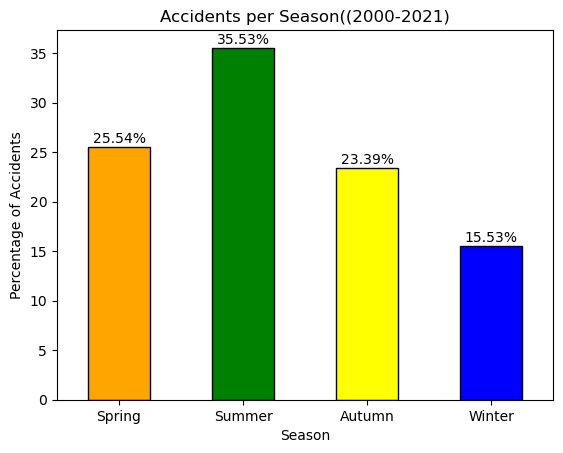

In [424]:

colors = ['orange','green','yellow','blue']

ax = accidents_per_season_pct.plot(kind='bar', color=colors, edgecolor='black')

for i, v in enumerate(accidents_per_season_pct):
    ax.text(i, v+0.4, f"{v:.2f}%", ha='center')

plt.xticks(rotation=0)
plt.xlabel('Season')
plt.ylabel('Percentage of Accidents')
plt.title('Accidents per Season((2000-2021)')
plt.savefig('../Images/accidents_per_season_pct.png')


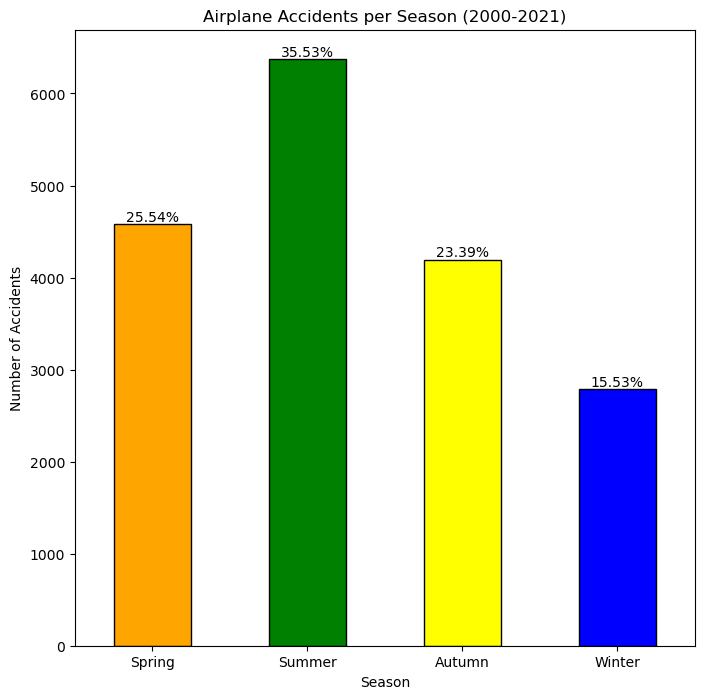

In [425]:
# What types of weather conditions are most commonly associated with aviation accidents?

colors = ['orange','green','yellow','blue']

fig, ax = plt.subplots(figsize=(8,8))
ax = accidents_per_season.plot(kind='bar', color=colors, edgecolor='black')

for i,v in enumerate(accidents_per_season_pct):
    ax.text(i, accidents_per_season[i]+30, f"{v:.2f}%", ha='center')
    
plt.xticks(rotation=0)
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.title('Airplane Accidents per Season (2000-2021)')
plt.savefig('../Images/accidents_per_season.png')


In [411]:
ax.containers

[<BarContainer object of 4 artists>]

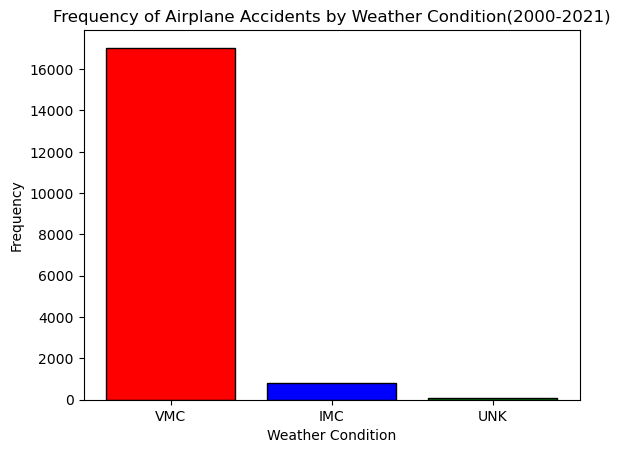

In [391]:
# How does the frequency of aviation accidents vary with different weather conditions?

weather_counts = clean_aviation_df['Weather_Condition'].value_counts()

colors = ['red','blue', 'green']

plt.bar(weather_counts.index, weather_counts.values, color=colors, edgecolor='black')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Airplane Accidents by Weather Condition(2000-2021)')
plt.savefig('../Images/freq_weather_condition.png')

plt.show()


In [392]:
# get unique values for weather conditions
weather_conditions = clean_aviation_df['Weather_Condition'].unique()
weather_conditions

array(['VMC', 'IMC', 'UNK'], dtype=object)

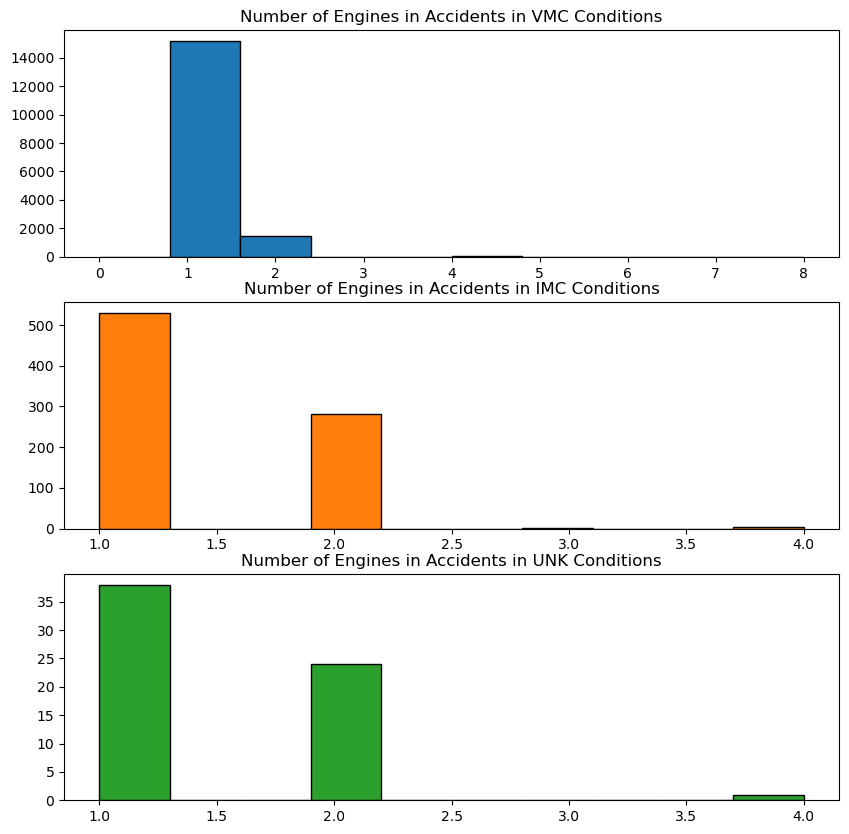

In [393]:
# Are certain types of aircraft more prone to accidents in certain weather conditions?


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))


colors = plt.get_cmap('tab10').colors

# loop through each unique weather condition
for i, condition in enumerate(weather_conditions):
    
    # get data for the specific weather condition
    data = clean_aviation_df[clean_aviation_df['Weather_Condition'] == condition]
    
    # plot data
    ax[i].hist(data['Number_of_Engines'], color=colors[i% len(colors)], edgecolor= 'black')
    ax[i].set_title(f"Number of Engines in Accidents in {condition} Conditions")

# show the plot
plt.savefig('../Images/Number_of_engines.png')
plt.show()

In [394]:
top_10_brands = clean_aviation_df["Make"].value_counts().nlargest(10)
top_10_brands

Cessna                5598
Piper                 3117
Beech                 1056
Mooney                 289
Boeing                 239
Bellanca               198
Maule                  189
Air Tractor Inc        182
Aeronca                173
Cirrus Design Corp     155
Name: Make, dtype: int64

# What do VMC and IMC mean to the Pilot?

VMC stands for “visual meteorological conditions”, while IMC is “instrument meteorological conditions”.
This graph shows that most accidents happen when pilots are actually piloting the airplane . However, it is also safe to assume that most flights happen when weather conditions are okay.

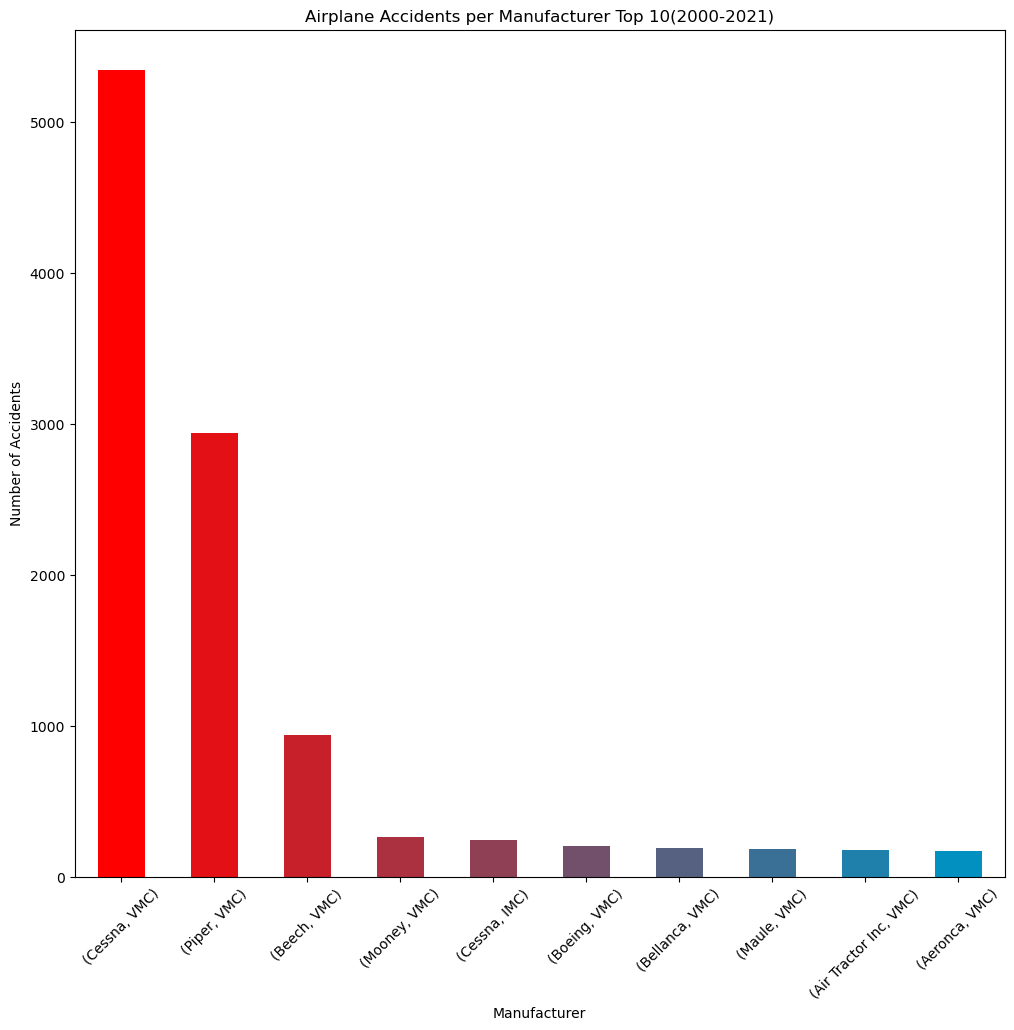

In [395]:
# Are certain types of aircraft more prone to accidents in certain weather conditions?

accidents_by_make = clean_aviation_df.groupby(['Make','Weather_Condition'])['Event_Date'].count().nlargest(10)

colors=['#FF0000', '#0290C0']

# plot
fig, ax = plt.subplots(figsize=(12, 11))
accidents_by_make.plot(kind='bar', color=get_color_gradient(colors[0],colors[1], 10))

plt.xticks(rotation=45)
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.title('Airplane Accidents per Manufacturer Top 10(2000-2021)')
plt.savefig('../Images/accidents_per_manufacturer.png')
plt.show()

In [396]:
# What role do human factors, such as pilot error or inadequate training, play in aviation accidents that are caused by adverse weather conditions?

pilot_error_count = pilot_error['Report.Status'].value_counts()
cause_weather_count = cause_weather['Report.Status'].value_counts()
probable_cause_count = probable_cause['Report.Status'].value_counts()
lost_planes_count = lost_planes['Report.Status'].value_counts()
other_cause_count = other_cause['Report.Status'].value_counts()


counts_df= pd.concat([pilot_error_count, cause_weather_count, probable_cause_count, lost_planes_count, other_cause_count], axis=1)
counts_df.columns = ['Pilot Error','Weather','Probable Cause','Unknown','Other']

counts_df = counts_df.fillna(0)

In [397]:
counts_df

Pilot Error  Weather  \
The pilot's failure to maintain directional con...         56.0      0.0   
The pilot's failure to maintain directional con...         43.0      0.0   
The pilots failure to maintain directional con...         21.0      0.0   
The pilot's improper recovery from a bounced la...         19.0      0.0   
The pilots failure to maintain directional con...         19.0      0.0   
...                                                         ...      ...   
The loss of engine power during climb due to ca...          0.0      0.0   
Improper clearance and inadequate heat shieldin...          0.0      0.0   
A loss of airplane control for reasons that cou...          0.0      0.0   
The inadequate maintenance of the wheel attachm...          0.0      0.0   
The airplanes impact with birds during approac...          0.0      0.0   

                                                    Probable Cause  Unknown  \
The pilot's failure to maintain directional con...             0.0      0.0   
The pilot's failure to maintain directional con...             0.0      0.0   
The pilots failure to maintain directional con...             0.0      0.0   
The pilot's improper recovery from a bounced la...             0.0      0.0   
The pilots failure to maintain directional con...             0.0      0.0   
...                                                            ...      ...   
The loss of engine power during climb due to ca...             0.0      0.0   
Improper clearance and inadequate heat shieldin...             0.0      0.0   
A loss of airplane control for reasons that cou...             0.0      0.0   
The inadequate maintenance of the wheel attachm...             0.0      0.0   
The airplanes impact with birds during approac...             0.0      0.0   

                                                    Other  
The pilot's failure to maintain directional con...    0.0  
The pilot's failure to maintain directional con...    0.0  
The pilots failure to maintain directional con...    0.0  
The pilot's improper recovery from a bounced la...    0.0  
The pilots failure to maintain directional con...    0.0  
...                                                   ...  
The loss of engine power during climb due to ca...    1.0  
Improper clearance and inadequate heat shieldin...    1.0  
A loss of airplane control for reasons that cou...    1.0  
The inadequate maintenance of the wheel attachm...    1.0  
The airplanes impact with birds during approac...    1.0  

[12454 rows x 5 columns]

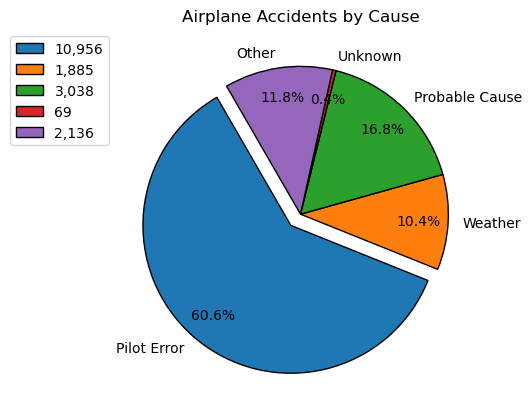

In [398]:
# What role do human factors, such as pilot error or inadequate training, play in aviation accidents that are caused by adverse weather conditions

explode=[0.1, 0, 0, 0, 0]
wedgeprops = {'edgecolor':'black'}
plt.pie(counts_df.sum().values, labels=counts_df.columns, autopct='%1.1f%%', pctdistance=0.8, explode=explode, startangle=120, wedgeprops=wedgeprops)
plt.title('Airplane Accidents by Cause')
legend_labels=['{:,}'.format(int(x)) for x in counts_df.sum()]
plt.legend(legend_labels, bbox_to_anchor=(0,1))
plt.savefig('../Images/Airplane_Accidents_by_cause.png')

plt.show()

In [399]:
pilot_error_count 

The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                                                                                                                                                            56
The pilot's failure to maintain directional control during landing.                                                                                                                                                                                                                                                                                                                                                                     43
The pilots failure to maintain directional control during the landing roll.\r\n\r                                                                

In [400]:
counts_df.drop_duplicates()
counts_df

Pilot Error  Weather  \
The pilot's failure to maintain directional con...         56.0      0.0   
The pilot's failure to maintain directional con...         43.0      0.0   
The pilots failure to maintain directional con...         21.0      0.0   
The pilot's improper recovery from a bounced la...         19.0      0.0   
The pilots failure to maintain directional con...         19.0      0.0   
...                                                         ...      ...   
The loss of engine power during climb due to ca...          0.0      0.0   
Improper clearance and inadequate heat shieldin...          0.0      0.0   
A loss of airplane control for reasons that cou...          0.0      0.0   
The inadequate maintenance of the wheel attachm...          0.0      0.0   
The airplanes impact with birds during approac...          0.0      0.0   

                                                    Probable Cause  Unknown  \
The pilot's failure to maintain directional con...             0.0      0.0   
The pilot's failure to maintain directional con...             0.0      0.0   
The pilots failure to maintain directional con...             0.0      0.0   
The pilot's improper recovery from a bounced la...             0.0      0.0   
The pilots failure to maintain directional con...             0.0      0.0   
...                                                            ...      ...   
The loss of engine power during climb due to ca...             0.0      0.0   
Improper clearance and inadequate heat shieldin...             0.0      0.0   
A loss of airplane control for reasons that cou...             0.0      0.0   
The inadequate maintenance of the wheel attachm...             0.0      0.0   
The airplanes impact with birds during approac...             0.0      0.0   

                                                    Other  
The pilot's failure to maintain directional con...    0.0  
The pilot's failure to maintain directional con...    0.0  
The pilots failure to maintain directional con...    0.0  
The pilot's improper recovery from a bounced la...    0.0  
The pilots failure to maintain directional con...    0.0  
...                                                   ...  
The loss of engine power during climb due to ca...    1.0  
Improper clearance and inadequate heat shieldin...    1.0  
A loss of airplane control for reasons that cou...    1.0  
The inadequate maintenance of the wheel attachm...    1.0  
The airplanes impact with birds during approac...    1.0  

[12454 rows x 5 columns]

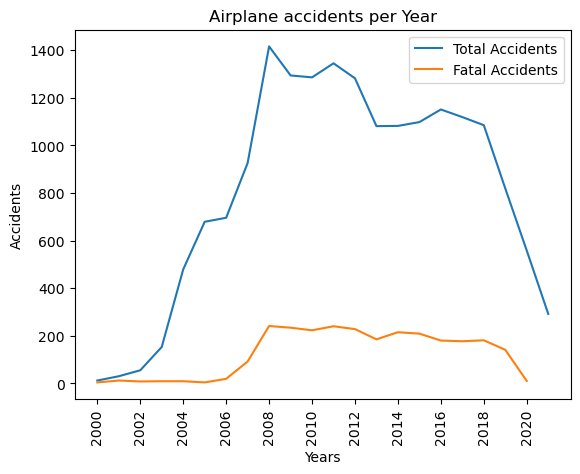

In [401]:
# accidents per year

accidents_per_year = clean_aviation_df.groupby('Year')['Event_Date'].count()

fatal_accidents_per_year = clean_aviation_df[clean_aviation_df['Injury_Severity'] == 'Fatal'].groupby('Year')['Event_Date'].count()

accidents_per_year.plot(label='Total Accidents')
fatal_accidents_per_year.plot(label='Fatal Accidents')
# add a legend
plt.legend()

# add labels and show the plot
plt.xticks(accidents_per_year.index[::2], rotation=90)
plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Airplane accidents per Year')
plt.savefig('../Images/accidents_per_year.png')
plt.show()

In [402]:
clean_aviation_df.loc[clean_aviation_df['Year']==2000]

Investigation_Type Event_Date  Year      Month  Season Day_of_Week  \
47743           Accident 2000-01-21  2000    January  Winter      Friday   
47864           Accident 2000-02-16  2000   February  Winter   Wednesday   
47869           Accident 2000-02-16  2000   February  Winter   Wednesday   
47870           Accident 2000-02-16  2000   February  Winter   Wednesday   
47876           Accident 2000-02-18  2000   February  Winter      Friday   
47942           Accident 2000-03-05  2000      March  Spring      Sunday   
48128           Accident 2000-04-05  2000      April  Spring   Wednesday   
48402           Accident 2000-05-20  2000        May  Spring    Saturday   
48908           Accident 2000-07-21  2000       July  Summer      Friday   
49038           Accident 2000-08-08  2000     August  Summer     Tuesday   
49356           Accident 2000-09-14  2000  September  Autumn    Thursday   
49879           Accident 2000-12-27  2000   December  Winter   Wednesday   

             Country State Injury_Severity Aircraft_damage  ...        Make  \
47743  United States    CA       Non-Fatal     Substantial  ...       Myers   
47864  United States    OK           Fatal     Substantial  ...      Cessna   
47869  United States    OK           Fatal       Destroyed  ...      Cessna   
47870  United States    CA           Fatal       Destroyed  ...     Douglas   
47876  United States    NV       Non-Fatal     Substantial  ...       Ayres   
47942  United States    CA       Non-Fatal       Destroyed  ...      Boeing   
48128  United States    FL           Fatal       Destroyed  ...     Learjet   
48402  United States    TN       Non-Fatal             NaN  ...      Boeing   
48908  United States    NV       Non-Fatal     Substantial  ...  Steel/Vans   
49038  United States    NE       Non-Fatal     Substantial  ...   Schweizer   
49356  United States    MI       Non-Fatal     Substantial  ...      Cessna   
49879  United States    MA       Non-Fatal             NaN  ...      Boeing   

           Model Amateur_Built Number_of_Engines    Engine_Type  \
47743        Q-2           1.0               1.0  Reciprocating   
47864       208B           0.0               1.0     Turbo Prop   
47869       182M           0.0               1.0  Reciprocating   
47870   DC-8-71F           0.0               4.0      Turbo Fan   
47876        NaN           0.0               1.0            NaN   
47942    737-300           0.0               2.0      Turbo Fan   
48128        35A           0.0               2.0      Turbo Fan   
48402    737-500           0.0               NaN      Turbo Fan   
48908        RV6           1.0               1.0  Reciprocating   
49038     G-164B           0.0               1.0  Reciprocating   
49356       208B           0.0               1.0     Turbo Prop   
49879  767-300ER           0.0               2.0      Turbo Fan   

                     FAR_Description   Purpose_of_flight  Weather_Condition  \
47743      Part 91: General Aviation            Personal                VMC   
47864  Part 135: Air Taxi & Commuter             Unknown                VMC   
47869      Part 91: General Aviation            Personal                VMC   
47870          Part 121: Air Carrier                 NaN                VMC   
47876      Part 91: General Aviation         Positioning                VMC   
47942          Part 121: Air Carrier             Unknown                VMC   
48128      Part 91: General Aviation       Instructional                VMC   
48402          Part 121: Air Carrier             Unknown                IMC   
48908      Part 91: General Aviation            Personal                VMC   
49038         Part 137: Agricultural  Aerial Application                VMC   
49356  Part 135: Air Taxi & Commuter                 NaN                VMC   
49879          Part 121: Air Carrier                 NaN                VMC   

        Report_Status Publication_Date  
47743  Probable Cause       2015-08-16  
47864  

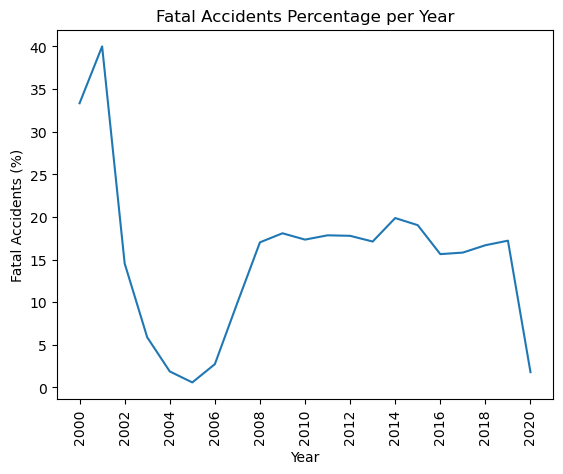

In [403]:
#  new dataframe with the percentage of fatal accidents
fatal_accidents_percentage = (fatal_accidents_per_year / accidents_per_year) * 100

# create the line plot
fatal_accidents_percentage.plot(label='Fatal Accidents Percentage')

# add labels and show the plot
plt.xticks(accidents_per_year.index[::2], rotation=90)
plt.xlabel('Year')
plt.ylabel('Fatal Accidents (%)')
plt.title('Fatal Accidents Percentage per Year')
plt.show()

In [404]:
percentage_total_fatal = (fatal_accidents_per_year.sum()/clean_aviation_df.shape[0])*100
percentage_total_fatal

14.611439402385995